### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [10]:
# Lista de lojas
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
soma_faturamento_loja = {}


# somar o faturamento de cada loja
for i in range(len(lojas)):
  soma_faturamento = lojas[i]["Preço"].sum()

# armazenar o faturamento como float
  soma_faturamento_loja[nomes_lojas[i]] = float(soma_faturamento)

# armazenar o faturamento geral da lojas
soma_geral = sum(soma_faturamento_loja.values())

# descobrir a loja com maior e menor faturamento
loja_maior_faturamento = max(soma_faturamento_loja, key=soma_faturamento_loja.get)
valor_maior_faturamento = soma_faturamento_loja[loja_maior_faturamento]

loja_menor_faturamento = min(soma_faturamento_loja, key=soma_faturamento_loja.get)
valor_menor_faturamento = soma_faturamento_loja[loja_menor_faturamento]


# criar dataframe
df_faturamento = pd.DataFrame({
    "Loja": nomes_lojas,
    "Faturamento": [f"{soma_faturamento_loja[nome]:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.') for nome in nomes_lojas]})

# exibir dataframe
print("-" * 30)
print(f"\033[1m     FATURAMENTO POR LOJA\033[0m")
print("-" * 30)
print(df_faturamento)
print("-" * 30)
print(f"\n")

# imprimir o maior e menor faturamento entre as lojas
print(f"\n\033[1mLOJA COM MAIOR FATURAMENTO:\033[0m {loja_maior_faturamento}\nValor: R$ {valor_maior_faturamento:,.2f}\n".replace(',', 'X').replace('.', ',').replace('X', '.'))
print("-" * 45)
print(f"\n\033[1mLOJA COM MENOR FATURAMENTO:\033[0m {loja_menor_faturamento}\nValor: R$ {valor_menor_faturamento:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"\n")
print("-" * 45)
print(f"\n\033[1mFATURAMENTO GERAL DAS LOJAS:\033[0m R$ {soma_geral:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"\n")
print("-" * 45)



------------------------------
     FATURAMENTO POR LOJA
------------------------------
     Loja   Faturamento
0  Loja 1  1.534.509,12
1  Loja 2  1.488.459,06
2  Loja 3  1.464.025,03
3  Loja 4  1.384.497,58
------------------------------



LOJA COM MAIOR FATURAMENTO: Loja 1
Valor: R$ 1.534.509,12

---------------------------------------------

LOJA COM MENOR FATURAMENTO: Loja 4
Valor: R$ 1.384.497,58


---------------------------------------------

FATURAMENTO GERAL DAS LOJAS: R$ 5.871.490,79


---------------------------------------------


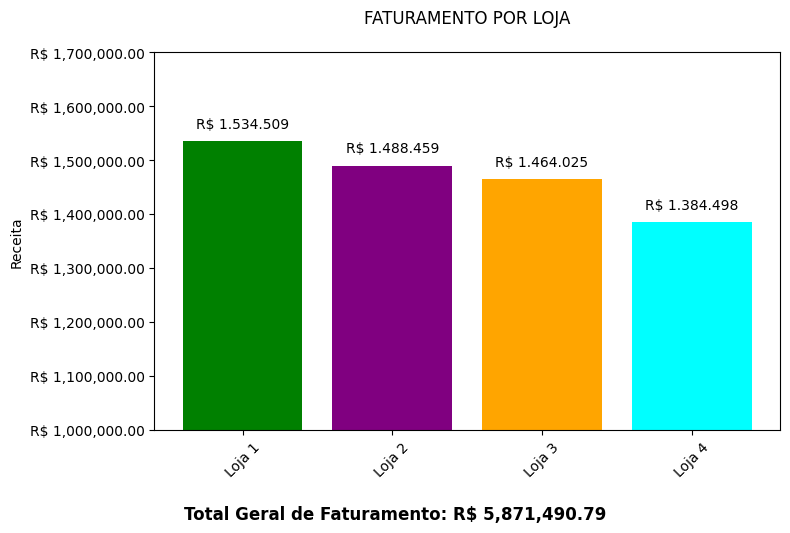

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# gerando gráfico de barras - receitas
x = [str(loja) for loja in soma_faturamento_loja.keys()]
y = [float(valor) for valor in soma_faturamento_loja.values()]

plt.figure(figsize=(8, 5))
cores = ["green","purple", "orange", "cyan"]
plt.bar(x, y, color=cores)

# adicionar os valores em cima das barras
for i in range(len(x)):
    plt.text(i, y[i] + 20000, f'R$ {y[i]:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
             ha='center', va='bottom')

def formato_real(x, pos):
    return f'R$ {x:,.2f}'

# exibindo o gráfico
plt.title(f"FATURAMENTO POR LOJA\n")
plt.ylabel("Receita")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formato_real))
plt.ylim(1000000, 1700000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.figtext(0.5, -0.05, f"Total Geral de Faturamento: R$ {soma_geral:,.2f}",
            ha="center", fontsize=12, weight='bold', color='black')
plt.show()

# 2. Vendas por Categoria


In [8]:
# Lista de lojas
lojas = [loja, loja2, loja3, loja4]

# armazenar categoria e preço de cada loja
for i in range(len(lojas)):
    # agrupar por categoria e contar o número de produtos
    categoria_loja = lojas[i].groupby(["Categoria do Produto"]).size()

    # agrupar por categoria e somar os preços
    preco_categoria_loja = lojas[i].groupby(["Categoria do Produto"])['Preço'].sum().reset_index()

    # criar a tabela de categorias
    tabela_categoria = pd.DataFrame({
        "Categoria do Produto": categoria_loja.index,
        "Vendas": categoria_loja.values})

    # renomear a coluna de preço para facilitar a junção
    preco_categoria_loja.rename(columns={'Preço': 'Total'}, inplace=True)

    # concatenar a coluna preço
    tabela_categoria = tabela_categoria.merge(preco_categoria_loja, on="Categoria do Produto", how="left")

    # formatar a coluna 'Total' para o padrão brasileiro
    tabela_categoria['Total'] = tabela_categoria['Total'].apply(lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') if pd.notnull(x) else 'R$ 0,00')

    # exibir dataframe
    print("-" * 50)
    print(f"\033[1m          Loja {i + 1} - CATEGORIA DO PRODUTO\033[0m")
    print("-" * 50)
    print(tabela_categoria)
    print(f"\n")

    # imprimir soma de vendas e preços de cada loja e o melhor faturamento entre as lojas
    categoria_melhor_desempenho = tabela_categoria['Total'].idxmax()
    faturamento_obtido = tabela_categoria['Total'].max()
    categoria_produto = tabela_categoria['Categoria do Produto'].iloc[categoria_melhor_desempenho]

    print(f"\033[1mCATEGORIA COM MAIOR FATURAMENTO:\033[0m {categoria_produto} - {faturamento_obtido}")
    print("-" * 65)
    print("\n\n")

--------------------------------------------------
          Loja 1 - CATEGORIA DO PRODUTO
--------------------------------------------------
    Categoria do Produto  Vendas       Total
0             brinquedos     324   23.993,78
1       eletrodomesticos     312  484.913,36
2            eletronicos     448  572.659,23
3        esporte e lazer     284   52.387,55
4  instrumentos musicais     182  121.731,69
5                 livros     173   11.713,92
6                 moveis     465  250.178,11
7  utilidades domesticas     171   16.931,48


CATEGORIA COM MAIOR FATURAMENTO: eletronicos - 572.659,23
-----------------------------------------------------------------



--------------------------------------------------
          Loja 2 - CATEGORIA DO PRODUTO
--------------------------------------------------
    Categoria do Produto  Vendas       Total
0             brinquedos     313   21.262,21
1       eletrodomesticos     305  464.758,13
2            eletronicos     422  547.773,71
3 

<Figure size 1000x600 with 0 Axes>

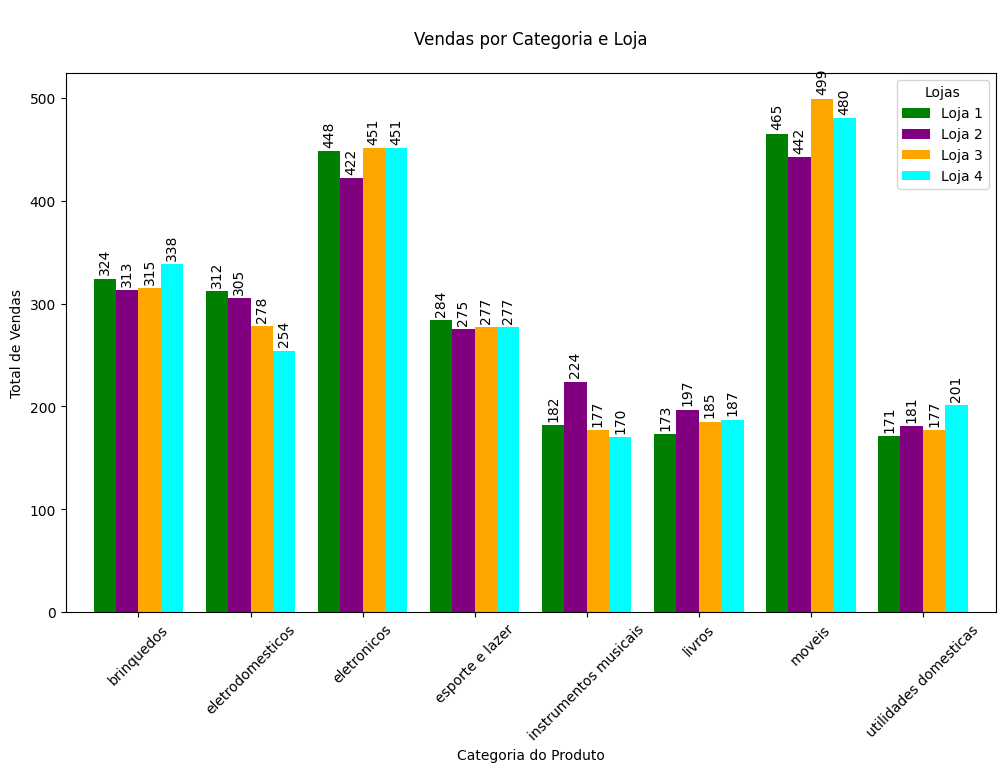

In [7]:
import matplotlib.pyplot as plt

# definindo os dados do gráfico
dict_categoria = {
    "Categoria do Produto": [
        "brinquedos", "eletrodomesticos", "eletronicos", "esporte e lazer",
        "instrumentos musicais", "livros", "moveis", "utilidades domesticas"
    ],
    "Loja 1": [324, 312, 448, 284, 182, 173, 465, 171],
    "Loja 2": [313, 305, 422, 275, 224, 197, 442, 181],
    "Loja 3": [315, 278, 451, 277, 177, 185, 499, 177],
    "Loja 4": [338, 254, 451, 277, 170, 187, 480, 201]
}

# aplicando cor as barras
cor = ["green", "purple", "orange", "cyan"]

# criando o dataframe
plt.figure(figsize=(10, 6))
df = pd.DataFrame(dict_categoria)
df.set_index("Categoria do Produto", inplace=True)

# personalizando o gráfico com cores e ajustando a largura
ax = df.plot(kind='bar', figsize=(12, 7), color=cor, width=0.8)  # Ajuste o valor de width conforme necessário

# adicionando os valores em cima das barras
for container in ax.containers:
    ax.bar_label(container, rotation=90, label_type='edge', padding=3)

# exibindo o gráfico
plt.title(f"\nVendas por Categoria e Loja\n")
plt.ylabel("Total de Vendas")
plt.legend(title="Lojas")
plt.xticks(rotation=45)
plt.show()

# 3. Média de Avaliação das Lojas

In [12]:
# Lista de lojas
lojas = [loja, loja2, loja3, loja4]
lista_avaliacao = []
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# loop para iterar sobre cada loja
for i in range(len(lojas)):
  # calcula o somatório por nota
  avaliacao_loja = lojas[i].groupby(["Avaliação da compra"]).size()

  # criar dataframe
  df_avaliacao = pd.DataFrame(list(avaliacao_loja.items()), columns=["Nota", "Total"])

  # ordenar o dataframe pela coluna "Nota"
  df_avaliacao = df_avaliacao.sort_values(by="Nota", ascending=False)

  # exibir dataframe
  print("-" * 50)
  print(f"\033[1m          Loja {i + 1} - Avaliação de Compra\033[0m")
  print("-" * 50)
  print(df_avaliacao)

  # imprimir a média de avaliação da loja
  media_avaliacao_loja = lojas[i]["Avaliação da compra"].mean()
  print(f"\n\033[1mMÉIDA DE AVALIAÇÃO DE COMPRA:\033[0m {media_avaliacao_loja: .2f}\n\n")

  # armazenar a média da loja em uma lista para gerar o gráfico
  lista_avaliacao.append([nomes_lojas[i], float(media_avaliacao_loja)])


--------------------------------------------------
          Loja 1 - Avaliação de Compra
--------------------------------------------------
   Nota  Total
4     5   1292
3     4    444
2     3    218
1     2     86
0     1    319

MÉIDA DE AVALIAÇÃO DE COMPRA:  3.98


--------------------------------------------------
          Loja 2 - Avaliação de Compra
--------------------------------------------------
   Nota  Total
4     5   1302
3     4    482
2     3    209
1     2     93
0     1    273

MÉIDA DE AVALIAÇÃO DE COMPRA:  4.04


--------------------------------------------------
          Loja 3 - Avaliação de Compra
--------------------------------------------------
   Nota  Total
4     5   1356
3     4    434
2     3    193
1     2     79
0     1    297

MÉIDA DE AVALIAÇÃO DE COMPRA:  4.05


--------------------------------------------------
          Loja 4 - Avaliação de Compra
--------------------------------------------------
   Nota  Total
4     5   1300
3     4    453
2   

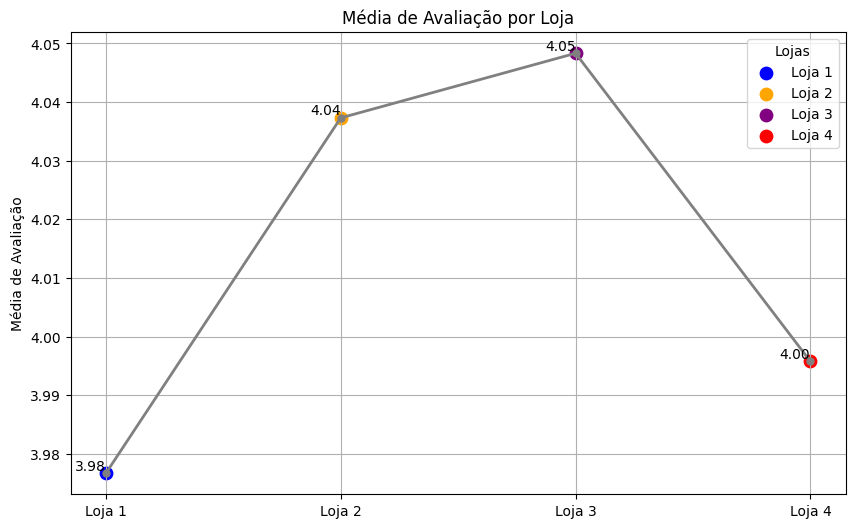

In [6]:
import matplotlib.pyplot as plt

# atribuindo o conteúdo das colunas a variáveis como listas
x = [item[0] for item in lista_avaliacao]  # Nomes das lojas
y = [item[1] for item in lista_avaliacao]  # Médias de avaliação

# definindo cores para os pontos
cores = ['blue', 'orange', 'purple', 'red']

# criar gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color="gray", linewidth=2, markersize=5)

# adicionar as lojas como legenda
for i in range(len(x)):
    plt.scatter(x[i], y[i], color=cores[i], s=80, label=x[i])

# adicionar os valores acima dos pontos
for i in range(len(x)):
    plt.text(x[i], y[i], f'{y[i]:.2f}', ha='right', va='bottom')

# exibindo o gráfico
plt.title('Média de Avaliação por Loja')
plt.ylabel('Média de Avaliação')
plt.legend(title='Lojas')
plt.grid(True)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [9]:
# Lista de lojas
lojas = [loja, loja2, loja3, loja4]

# criar listas para armazenar os dados
dados_maior = []
dados_menor = []

# iterar sobre cada loja
for i, df_loja in enumerate(lojas, start=1):
    # contar vendas por produto
    vendas_por_produto = df_loja['Produto'].value_counts()

    # identificar maior e menor quantidade de vendas
    max_vendas = vendas_por_produto.max()
    min_vendas = vendas_por_produto.min()

    # filtrar produtos com o maior número de vendas (empates incluídos)
    produtos_max = vendas_por_produto[vendas_por_produto == max_vendas]
    for produto, vendas in produtos_max.items():
        dados_maior.append({"Loja": f"Loja {i}", "Produto": produto, "Vendas": vendas})

    # filtrar produtos com o menor número de vendas (empates incluídos)
    produtos_min = vendas_por_produto[vendas_por_produto == min_vendas]
    for produto, vendas in produtos_min.items():
        dados_menor.append({"Loja": f"Loja {i}", "Produto": produto, "Vendas": vendas})

# criar DataFrames com os resultados
tabela_maior_venda = pd.DataFrame(dados_maior)
tabela_menor_venda = pd.DataFrame(dados_menor)

# exibir as tabelas de maior e menor produtos vendidos
print("-" * 50)
print(f"\033[1m          PRODUTOS MAIS VENDIDOS POR LOJA\033[0m")
print("-" * 50)
print(tabela_maior_venda)
print("\n")

print("-" * 50)
print(f"\033[1m          PRODUTOS MENOS VENDIDOS POR LOJA\033[0m")
print("-" * 50)
print(tabela_menor_venda)
print("\n")
print("-" * 50)

--------------------------------------------------
          PRODUTOS MAIS VENDIDOS POR LOJA
--------------------------------------------------
     Loja                   Produto  Vendas
0  Loja 1               Micro-ondas      60
1  Loja 1             TV Led UHD 4K      60
2  Loja 1             Guarda roupas      60
3  Loja 2  Iniciando em programação      65
4  Loja 3             Kit banquetas      57
5  Loja 4                  Cama box      62


--------------------------------------------------
          PRODUTOS MENOS VENDIDOS POR LOJA
--------------------------------------------------
     Loja            Produto  Vendas
0  Loja 1            Headset      33
1  Loja 1       Celular ABXY      33
2  Loja 2  Jogo de tabuleiro      32
3  Loja 3   Blocos de montar      35
4  Loja 4           Guitarra      33


--------------------------------------------------


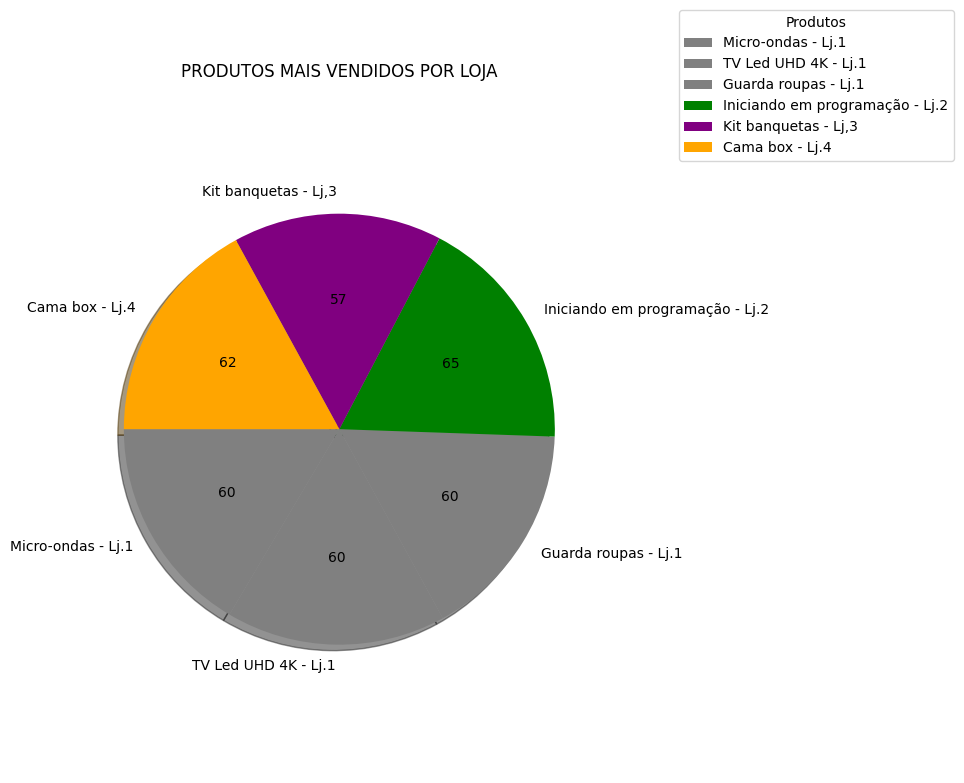

______________________________________________________________________________________________________________________________________________________
______________________________________________________________________________________________________________________________________________________





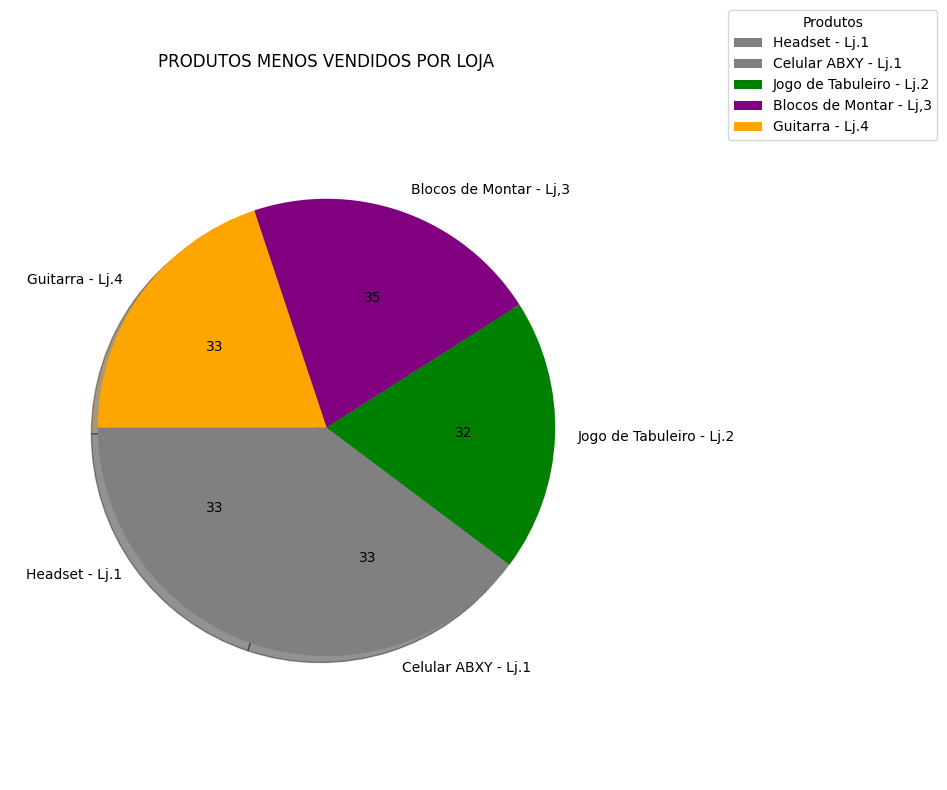

In [13]:
#---------------------------------
#      GRÁFICO MAIS VENDIDOS
#---------------------------------

import matplotlib.pyplot as plt

# dados MAIS vendidos
dict_produtos_mais = {
    "Produto": ["Micro-ondas - Lj.1", "TV Led UHD 4K - Lj.1", "Guarda roupas - Lj.1", "Iniciando em programação - Lj.2", "Kit banquetas - Lj,3", "Cama box - Lj.4"],
    "Vendas": [60, 60, 60, 65, 57, 62]}

# criar o dataframe
df = pd.DataFrame(dict_produtos_mais)

# criar o gráfico de pizza
cores = ["Gray", "Gray", "Gray", "Green", "Purple", "Orange"]
plt.figure(figsize=(10, 8))

# função para formatar os rótulos com os valores das vendas
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))  # Calcula o valor absoluto e arredonda
    return f'{absolute}'  # Retorna o valor das vendas

# Criando o gráfico de pizza
plt.pie(df['Vendas'], labels=df['Produto'], autopct=lambda pct: func(pct, df['Vendas']), startangle=180, shadow=True, colors=cores)

# exibir o gráfico
plt.title("PRODUTOS MAIS VENDIDOS POR LOJA")
plt.axis('equal')
plt.legend(title="Produtos", loc="center", bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.show()
print("_" * 150)
print("_" * 150)
print(f"\n\n")


#---------------------------------
#    GRÁFICO MENOS VENDIDOS
#---------------------------------

import matplotlib.pyplot as plt

# dados MENOS vendidos
dict_produtos_menos = {
    "Produto": ["Headset - Lj.1", "Celular ABXY - Lj.1", "Jogo de Tabuleiro - Lj.2", "Blocos de Montar - Lj,3", "Guitarra - Lj.4"],
    "Vendas": [33, 33, 32, 35, 33]}

# criar o dataframe
df = pd.DataFrame(dict_produtos_menos)

# criando o gráfico de pizza
cores = ["Gray", "Gray", "Green", "Purple", "Orange"]
plt.figure(figsize=(10, 8))

# função para formatar os rótulos com os valores das vendas
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))  # Calcula o valor absoluto e arredonda
    return f'{absolute}'  # Retorna o valor das vendas

# Criando o gráfico de pizza
plt.pie(df['Vendas'], labels=df['Produto'], autopct=lambda pct: func(pct, df['Vendas']), startangle=180, shadow=True, colors=cores)

# exibindo o gráfico
plt.title("PRODUTOS MENOS VENDIDOS POR LOJA")
plt.axis('equal')
plt.legend(title="Produtos", loc="center", bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [14]:
# Lista de lojas
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# somando o gasto com frete de cada loja e formantando o resultado para duas casas decimais
soma_frete_loja = {
  "Loja 1": format(float(loja["Frete"].sum()), ",.2f").replace(',', 'X').replace('.', ',').replace('X', '.'),
  "Loja 2": format(float(loja2["Frete"].sum()), ",.2f").replace(',', 'X').replace('.', ',').replace('X', '.'),
  "Loja 3": format(float(loja3["Frete"].sum()), ",.2f").replace(',', 'X').replace('.', ',').replace('X', '.'),
  "Loja 4": format(float(loja4["Frete"].sum()), ",.2f").replace(',', 'X').replace('.', ',').replace('X', '.')
}

# descobrindo a loja com maior e menor gasto com frete
loja_maior_frete = max(soma_frete_loja, key=soma_frete_loja.get)
valor_maior_frete = max(soma_frete_loja.values())

loja_menor_frete = min(soma_frete_loja, key=soma_frete_loja.get)
valor_menor_frete = min(soma_frete_loja.values())

# dicionário para armazenar a média de frete
media_frete_loja = {}

# calcular a média de frete
for i in range(len(lojas)):
    media_frete = lojas[i]["Frete"].mean()

    # formatar o valor para duas casas decimais
    media_frete_formatada = format(media_frete, ",.2f").replace(',', 'X').replace('.', ',').replace('X', '.')
    media_frete_loja[nomes_lojas[i]] = media_frete_formatada

# criar dataframe com soma e média dos fretes
df_frete = pd.DataFrame({
    "Loja": nomes_lojas,
    "Total": [soma_frete_loja[nome] for nome in nomes_lojas],
    "Média": [media_frete_loja[nome] for nome in nomes_lojas]})

# exibir dataframe com soma e média dos fretes
print("-" * 35)
print(f"\033[1m  TOTAL E MÉDIA DE FRETE POR LOJA\033[0m")
print("-" * 35)
print(df_frete)
print("-" * 35)

# imprimindo a loja com maior e menor gasto com frete
print(f"\n\033[1mLOJA COM MAIOR GASTO COM FRETE\033[0m {loja_maior_frete} - \033[1mValor:\033[0m {valor_maior_frete} \n")
print("-" * 60)
print(f"\n\033[1mLOJA COM MENOR GASTO COM FRETE:\033[0m {loja_menor_frete} - \033[1mValor:\033[0m {valor_menor_frete} \n")
print("-" * 60)


-----------------------------------
  TOTAL E MÉDIA DE FRETE POR LOJA
-----------------------------------
     Loja      Total  Média
0  Loja 1  81.837,97  34,69
1  Loja 2  79.314,16  33,62
2  Loja 3  78.022,66  33,07
3  Loja 4  73.755,88  31,28
-----------------------------------

LOJA COM MAIOR GASTO COM FRETE Loja 1 - Valor: 81.837,97 

------------------------------------------------------------

LOJA COM MENOR GASTO COM FRETE: Loja 4 - Valor: 73.755,88 

------------------------------------------------------------


# 📊 **Relatório Final de Análise das Lojas**

# **Objetivo da Análise**

O objetivo deste relatório é auxiliar o Senhor João na tomada de decisão sobre qual das quatro lojas deve ser vendida. Para isso, foi realizada uma análise detalhada com base nos seguintes critérios:

*   Faturamento total das lojas
*   Desempenho por categoria de produtos
*   Desempenho por categoria de produtos
*   Produtos mais e menos vendidos
*   Gasto e média com frete

________________________________________
# **1.** **Faturamento Total**

A análise do faturamento total revelou os seguintes resultados:

*   **Loja 1:**  R$ 1.534.509,12

*   **Loja 2:**  R$ 1.488.459,06

*   **Loja 3:**  R$ 1.464.025,03

*   **Loja 4**:  R$ 1.384.497,58

🔼 Maior Faturamento: Loja 1

🔽 Menor Faturamento: Loja 4

**Conclusão:** A **Loja 1** é a mais lucrativa, enquanto a **Loja 4** tem o menor faturamento.

________________________________________
# **2.** **Categorias de Produtos Mais e Menos Vendidas**

A categoria mais vendida em todas as lojas foi **"móveis"**, seguida por **"eletrônicos"** e **"brinquedos"**. As menos vendidas variam, com **"livros”**, **“instrumentos musicais"** e **"utilidades domésticas"** aparecendo com menor frequência em algumas lojas.

**Conclusão:** As categorias de alto valor estão bem distribuídas entre as lojas, com destaque consistente para móveis.

________________________________________
# **3. Média de Avaliação dos Clientes**

As médias de avaliação por loja foram:


*   **Loja 1:** 3,98

*   **Loja 2:** 4,04


*   **Loja 3:** 4,05

*   **Loja 4:** 4,00

🏆 **Melhor Avaliação:** Loja 3
📉 **Pior Avaliação:** Loja 1

**Conclusão:** A **Loja 3** apresenta a melhor satisfação do cliente, enquanto a **Loja 1** tem o menor desempenho nesse aspecto.

________________________________________
# **4. Produtos Mais e Menos Vendidos**

**•	Mais vendidos:** Loja 2 (com 65 unidades de **“Iniciando em programação”**) e Loja 4 (com 62 unidades de **“Cama box”**).
**•	Menos vendidos:** Loja 2 e Loja 4 possuem produtos com vendas muito baixas, abaixo de 35 unidades. O produto com menos saída foi **“jogo de tabuleiro”** da Loja 2 e **“guitarra”** da Loja 4.

**Conclusão:** Há equilíbrio nos produtos de maior saída, mas lojas como a 4 e a 2 têm itens com baixa rotatividade.
________________________________________
# **5. Frete Médio por Loja**

**Loja  - Total Frete	 Frete Médio**

Loja 1	81.837,97	34,69

Loja 2	79.314,16	33,62

Loja 3	78.022,66	33,07

Loja 4	73.755,88	31,28

🔼 **Maior custo médio de frete:** Loja 1
🔽 **Menor custo médio de frete:** Loja 4

**Conclusão:** A **Loja 4** tem o menor custo de frete, o que é positivo, mas não compensa seus outros pontos fracos.

________________________________________
# ✅ **Conclusão e Recomendação Final**

Com base nos dados analisados:



*   **Loja 1** tem o maior faturamento, mas apresenta frete mais caro e avaliações medianas.

*   **Loja 2** apresenta desempenho intermediário em todos os quesitos.

*   **Loja 3** se destaca pela melhor avaliação dos clientes e desempenho equilibrado em vendas e frete.


*   **Loja 4** tem o menor faturamento  e desempenho mais fraco em categorias e produtos.


# 🛑 **Recomendação:**

**O Senhor João deve vender a Loja 4.**

Apesar de ter o menor custo com frete, a Loja 4 apresenta **baixa rentabilidade, avaliação dos clientes baixa e pouco destaque nos produtos mais vendidos.**

Manter as lojas 1 e 3 trará melhores retornos financeiros e maior fidelização de clientes.

